# Yolov8 Introduction

In [16]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image
import pkg_resources

In [25]:
ultralytics_version = pkg_resources.get_distribution("ultralytics").version
print(ultralytics_version)

8.1.29


In [19]:
# Detection Model 
det_model = YOLO('yolov8n.pt')

# Instance Model
instance_model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:01<00:00, 4.47MB/s]


In [20]:
det_model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [24]:
# Read images
image_path = "/home/ravina/Desktop/Detectron2/Images/image.png"

# It converts the image_path into numpy array, we can pass batch of input images

detection_results = det_model.predict(image_path)

instance_seg_results = instance_model.predict(image_path)


image 1/1 /home/ravina/Desktop/Detectron2/Images/image.png: 448x640 5 persons, 23 cars, 2 handbags, 6.3ms
Speed: 8.4ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/ravina/Desktop/Detectron2/Images/image.png: 448x640 5 persons, 22 cars, 2 handbags, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


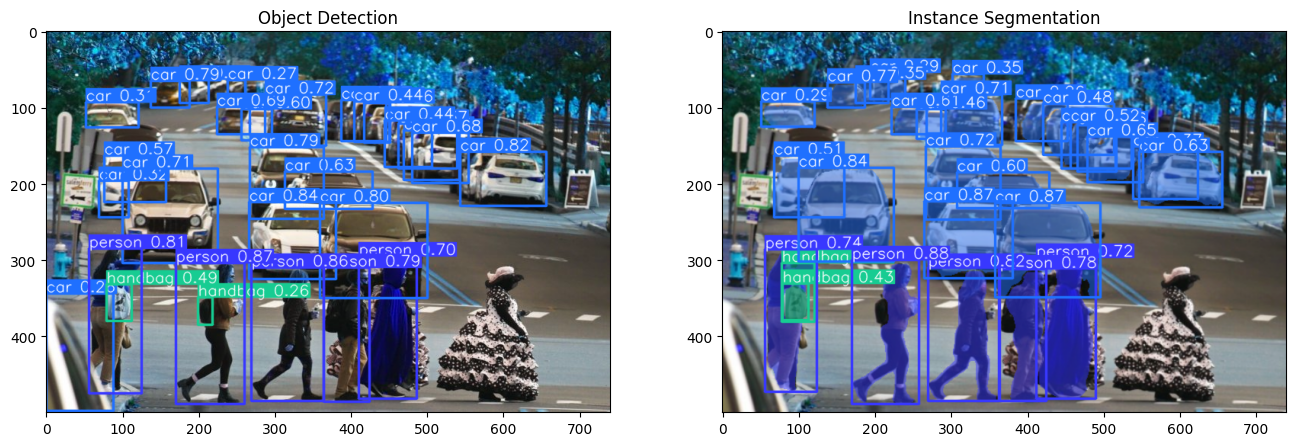

In [28]:
# Plot the results

detection_result_array = detection_results[0].plot()

instance_result_array = instance_seg_results[0].plot()

fig = plt.figure(figsize=(16,8))
ax1=fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)

ax2=fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)


In [36]:
res = instance_seg_results[0]
len(res.boxes)

# Lets print first bounding box 
box = res.boxes[0]
coordinates = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
# print(box)

print(f"Object Type - {class_id}")
print(f"Co-ordinates - {coordinates}")
print(f"Probability - {conf}")

Object Type - 0.0
Co-ordinates - [170.39083862304688, 300.9374694824219, 258.7651062011719, 489.0504455566406]
Probability - 0.8775597810745239


In [37]:
res.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou